Homework 4:

Write a short (2 page) paper that introduces, solves, and discusses the results from these problems below.

Start from the 1D and 2D Ising model programs we discussed in class

https://colab.research.google.com/drive/1xUB48UpB4Z87yPl2hJ8-8p4wBsH2wKcN?usp=sharing 

https://colab.research.google.com/drive/1eNzGeLRa8N3uPA-N8Sd0rNSnNZLITNQI?usp=sharing 

 - Do as much of 17.4.2 "Equilibration, Thermodynamic Properties (Assessment)" as you can

https://docs.google.com/document/d/1nn-2GkRX4fjEr5y_usLedcZbWkXo9FufTLlJKmo9WK8/edit?tab=t.iw19628hmo7s

In [31]:
import numpy as np
from vpython import canvas, arrow, vector, color, rate, graph, gcurve
import matplotlib.pyplot as plt

In [1]:
from vpython import *
import numpy as np
import random
import math

# -----------------------------------
# PARAMETERS
# -----------------------------------
N = 30
steps = 300

# -----------------------------------
# ENERGY FUNCTION
# -----------------------------------
def calcEnergy(config):
    energy = 0
    for i in range(N):
        S = config[0, i]
        nb = config[0, (i + 1) % N] + config[0, (i - 1) % N]
        energy += -nb * S
    return energy / 2.0

# -----------------------------------
# RUN ONE SIMULATION WITH VPYTHON + HISTORY
# -----------------------------------
def run_simulation_with_visuals(T, y_offset, color_label):
    beta = 1.0 / T
    config = 2 * np.random.randint(1, size=(1, N)) - 1

    # Create spin arrows
    spin_arrows = []
    for i in range(N):
        arrow_obj = arrow(pos=vector(i - N / 2, y_offset, 0),
                          axis=vector(0, config[0, i], 0),
                          color=color.yellow if config[0, i] == 1 else color.white,
                          shaftwidth=0.3)
        spin_arrows.append(arrow_obj)

    # Graph
    graph(title=f"Energy Over Time (T = {T})", xtitle="Step", ytitle="Energy", fast=False, height=200, width=500)
    energy_curve = gcurve(color=color_label)

    # Track config + energy history
    config_history = []
    energy_history = []

    E = calcEnergy(config)

    for step in range(steps):
        rate(120)
        b = random.randint(0, N - 1)
        s = config[0, b]
        nb = config[0, (b + 1) % N] + config[0, (b - 1) % N]
        cost = 2 * s * nb

        if cost < 0 or random.random() < math.exp(-cost * beta):
            config[0, b] *= -1
            s = config[0, b]
            E = calcEnergy(config)

            # update arrow
            spin_arrows[b].axis = vector(0, s, 0)
            spin_arrows[b].color = color.yellow if s == 1 else color.white

        config_history.append(config.copy())
        energy_history.append(E)
        energy_curve.plot(step, E)

    return config_history, energy_history

# -----------------------------------
# RUN BOTH SIMULATIONS WITH VISUALS
# -----------------------------------
scene = canvas(title="Ising Model - High vs Low T", width=600, height=400, background=color.black)
highT_history, highT_energy = run_simulation_with_visuals(T=100.0, y_offset=2, color_label=color.red)
lowT_history, lowT_energy = run_simulation_with_visuals(T=1.0, y_offset=-2, color_label=color.cyan)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# Final version to run simulations, show visuals once, and compute domain & energy stats

def count_domains(config):
    spins = config[0]
    domains = 1
    for i in range(1, len(spins)):
        if spins[i] != spins[i - 1]:
            domains += 1
    return domains, len(spins) / domains

# Run 10 times, show visual only once
def batch_stats_with_visual_once(T, y_offset, color_label):
    domain_counts = []
    domain_sizes = []
    energies = []

    for i in range(10):
        if i == 0:
            config_history, energy_history = run_simulation_with_visuals(T=T, y_offset=y_offset, color_label=color_label)
        else:
            config_history, energy_history = run_simulation_with_visuals(T=T, y_offset=0, color_label=color.white)

        final_config = config_history[-1]
        final_energy = energy_history[-1]
        domains, avg_size = count_domains(final_config)

        domain_counts.append(domains)
        domain_sizes.append(avg_size)
        energies.append(final_energy)

    return {
        "avg_domains": np.mean(domain_counts),
        "avg_size": np.mean(domain_sizes),
        "avg_energy": np.mean(energies)
    }

# Example usage (run this after defining everything above)
scene = canvas(title="Ising Model Summary - Batch Stats", width=600, height=300, background=color.black)

lowT_summary = batch_stats_with_visual_once(T=1.0, y_offset=2, color_label=color.cyan)
highT_summary = batch_stats_with_visual_once(T=100.0, y_offset=-2, color_label=color.red)

lowT_summary, highT_summary


<IPython.core.display.Javascript object>

({'avg_domains': 2.6, 'avg_size': 17.2, 'avg_energy': -26.8},
 {'avg_domains': 14.7, 'avg_size': 2.114647542859617, 'avg_energy': -1.6})

In [ ]:

({'avg_domains': 2.6, 'avg_size': 17.2, 'avg_energy': -26.8},
 {'avg_domains': 14.7, 'avg_size': 2.114647542859617, 'avg_energy': -1.6})

Running T = 0.50
Running T = 1.00
Running T = 1.50
Running T = 2.00
Running T = 2.50
Running T = 3.00
Running T = 3.50
Running T = 4.00
Running T = 4.50
Running T = 5.00


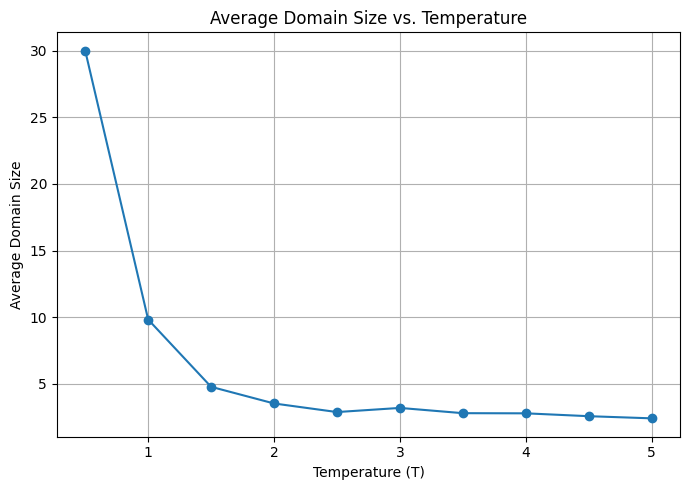

In [3]:
# Loop over multiple temperatures and plot average domain size vs. temperature
import matplotlib.pyplot as plt

# List of temperatures to try (adjustable)
temperatures = np.linspace(0.5, 5.0, 10)
avg_sizes = []

# Only show visual for the first temperature
for i, T in enumerate(temperatures):
    print(f"Running T = {T:.2f}")
    summary = batch_stats_with_visual_once(
        T=T,
        y_offset=2 if i == 0 else 0,
        color_label=color.cyan if i == 0 else color.white
    )
    avg_sizes.append(summary["avg_size"])

# Plotting
plt.figure(figsize=(7, 5))
plt.plot(temperatures, avg_sizes, marker='o', linestyle='-')
plt.xlabel("Temperature (T)")
plt.ylabel("Average Domain Size")
plt.title("Average Domain Size vs. Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Re-run after execution state reset
import numpy as np
import random
import math

# --- PARAMETERS (user-controlled) ---
N = 30       # Number of spins
steps = 300  # Number of simulation steps

# --- ENERGY FUNCTION ---
def calc_energy(config):
    energy = 0
    for i in range(N):
        S = config[0, i]
        nb = config[0, (i + 1) % N] + config[0, (i - 1) % N]
        energy += -nb * S
    return energy / 2.0

# --- SIMULATION CORE (no visuals) ---
def run_ising_simulation(T):
    beta = 1.0 / T
    config = 2 * np.random.randint(1, size=(1, N)) - 1  # All spins down

    energy_history = []
    config_history = []

    for step in range(steps):
        b = random.randint(0, N - 1)
        s = config[0, b]
        nb = config[0, (b + 1) % N] + config[0, (b - 1) % N]
        cost = 2 * s * nb

        if cost < 0 or random.random() < math.exp(-cost * beta):
            config[0, b] *= -1

        energy = calc_energy(config)
        energy_history.append(energy)
        config_history.append(config.copy())

    return {
        "energy_history": np.array(energy_history),
        "config_history": np.array(config_history),
        "T": T
    }

In [6]:
# --- ANALYSIS FUNCTIONS (post-simulation) ---

def domain_count(config):
    spins = config[0]
    count = 1
    for i in range(1, len(spins)):
        if spins[i] != spins[i - 1]:
            count += 1
    return count

def average_energy_fluctuation(energy_history):
    return np.std(energy_history)

def average_domain_size(config):
    count = domain_count(config)
    return N / count

def summarize_simulation(sim):
    final_config = sim["config_history"][-1]
    final_energy = sim["energy_history"][-1]
    return {
        "avg_energy": np.mean(sim["energy_history"]),
        "final_energy": final_energy,
        "energy_fluctuation": average_energy_fluctuation(sim["energy_history"]),
        "final_domain_count": domain_count(final_config),
        "final_avg_domain_size": average_domain_size(final_config)
    }

## Simulation

In [26]:
# parameters
N = 30           
steps = 300   

def calc_energy(config):
    energy = 0
    for i in range(N):
        S = config[0, i]
        nb = config[0, (i + 1) % N] + config[0, (i - 1) % N]
        energy += -nb * S
    return energy / 2.0

def run_ising_sim(T):
    beta = 1.0 / T
    config = 2 * np.random.randint(1, size=(1, N)) - 1  # cold start

    sim = np.zeros((steps, N + 1))  # N spins + energy per step

    for step in range(steps):
        b = np.random.randint(0, N)
        s = config[0, b]
        nb = config[0, (b + 1) % N] + config[0, (b - 1) % N]
        cost = 2 * s * nb

        if cost < 0 or np.random.rand() < np.exp(-cost * beta):
            config[0, b] *= -1

        E = calc_energy(config)
        sim[step, :-1] = config
        sim[step, -1] = E

    return sim

In [25]:
run_ising_sim(1.0)

array([[ -1.,  -1.,  -1., ...,  -1.,  -1., -30.],
       [ -1.,  -1.,  -1., ...,  -1.,  -1., -30.],
       [ -1.,  -1.,  -1., ...,  -1.,  -1., -30.],
       ...,
       [  1.,   1.,   1., ...,  -1.,  -1., -18.],
       [  1.,   1.,   1., ...,  -1.,  -1., -18.],
       [  1.,   1.,   1., ...,  -1.,  -1., -18.]])

## Visualization

In [27]:
def visualize(sim):
    steps, total = sim.shape
    N = total - 1  # Number of spins

    scene = canvas(title="Ising Model Visualization", width=600, height=400, background=color.black)
    graph(title="Energy Over Time", xtitle="Step", ytitle="Energy", fast=False, height=200, width=500)
    energy_curve = gcurve(color=color.cyan)

    arrows = []
    for i in range(N):
        s = sim[0, i]
        a = arrow(pos=vector(i - N / 2, 0, 0),
                  axis=vector(0, s, 0),
                  color=color.yellow if s == 1 else color.white,
                  shaftwidth=0.3)
        arrows.append(a)

    for step in range(steps):
        rate(60)
        config = sim[step, :-1]
        energy = sim[step, -1]

        for i in range(N):
            spin = config[i]
            arrows[i].axis = vector(0, spin, 0)
            arrows[i].color = color.yellow if spin == 1 else color.white

        energy_curve.plot(step, energy)

In [24]:
visualize(run_ising_sim(50))

<IPython.core.display.Javascript object>

## Analysis

### Fluctuation

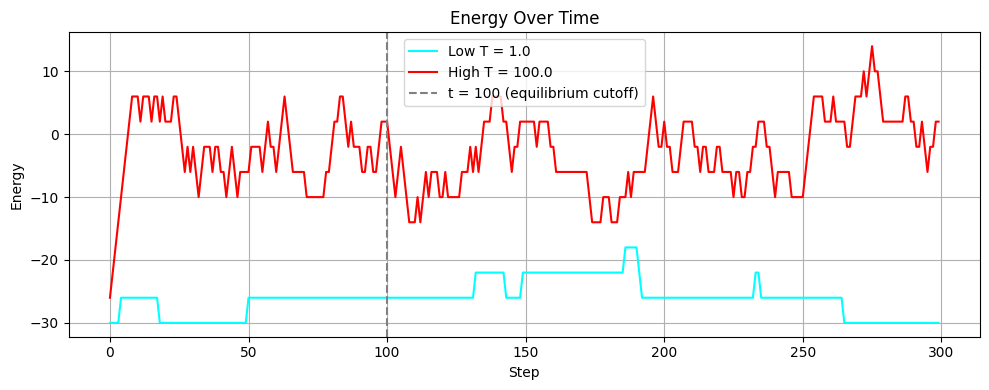

In [32]:
sim_low = run_ising_sim(1.0)
sim_high = run_ising_sim(100.0)

plt.figure(figsize=(10, 4))
plt.plot(sim_low[:, -1], label='Low T = 1.0', color='cyan')
plt.plot(sim_high[:, -1], label='High T = 100.0', color='red')
plt.axvline(x=100, linestyle='--', color='gray', label='t = 100 (equilibrium cutoff)')
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("Energy Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

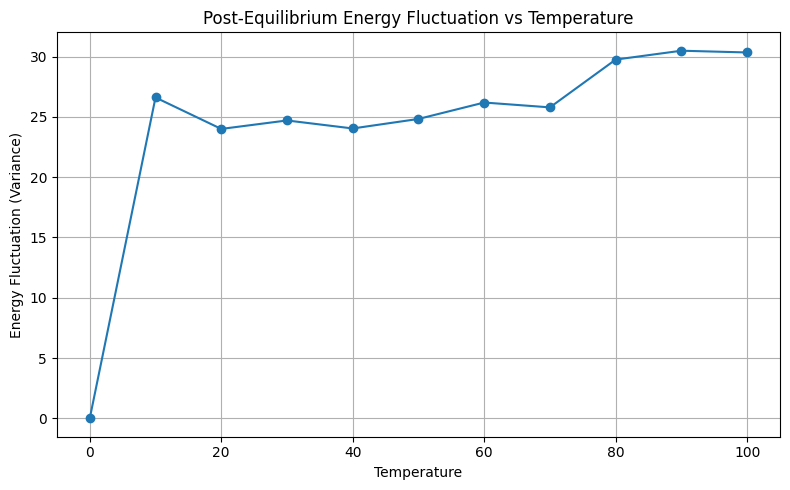

In [36]:
temperatures = list(range(0, 101, 10))
equilibrium_cutoff = 100
runs_per_temp = 5

avg_variances = []

for T in temperatures:
    if T == 0:
        avg_variances.append(0)
        continue
    
    variances = []
    for _ in range(runs_per_temp):
        sim = run_ising_sim(T)
        post_eq_energy = sim[equilibrium_cutoff:, -1]
        var = np.var(post_eq_energy)
        variances.append(var)

    avg_variances.append(np.mean(variances))

plt.figure(figsize=(8, 5))
plt.plot(temperatures, avg_variances, marker='o')
plt.xlabel("Temperature")
plt.ylabel("Energy Fluctuation (Variance)")
plt.title("Post-Equilibrium Energy Fluctuation vs Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

### Domain Count

In [43]:
def count_domains(config):
    return np.sum(config[1:] != config[:-1]) + 1

temperatures = [1.0, 100.0]
runs_per_temp = 10

summary_data = {}

for T in temperatures:
    energies = []
    domain_counts = []
    domain_sizes = []

    for _ in range(runs_per_temp):
        sim = run_ising_sim(T)
        final_config = sim[-1, :-1]
        final_energy = sim[-1, -1]
        domains = count_domains(final_config)
        size = N / domains

        energies.append(final_energy)
        domain_counts.append(domains)
        domain_sizes.append(size)

    summary_data[T] = {
        "avg_energy": np.mean(energies),
        "avg_domain_count": np.mean(domain_counts),
        "avg_domain_size": np.mean(domain_sizes)
    }

for T in summary_data:
    print(f"Temperature: {T}")
    print(f"  Avg Energy:        {summary_data[T]['avg_energy']:.2f}")
    print(f"  Avg Domain Count:  {summary_data[T]['avg_domain_count']:.1f}")
    print(f"  Avg Domain Size:   {summary_data[T]['avg_domain_size']:.2f}")
    print()

Temperature: 1.0
  Avg Energy:        -23.20
  Avg Domain Count:  4.2
  Avg Domain Size:   8.00

Temperature: 100.0
  Avg Energy:        1.20
  Avg Domain Count:  16.2
  Avg Domain Size:   1.95



### Domain Size

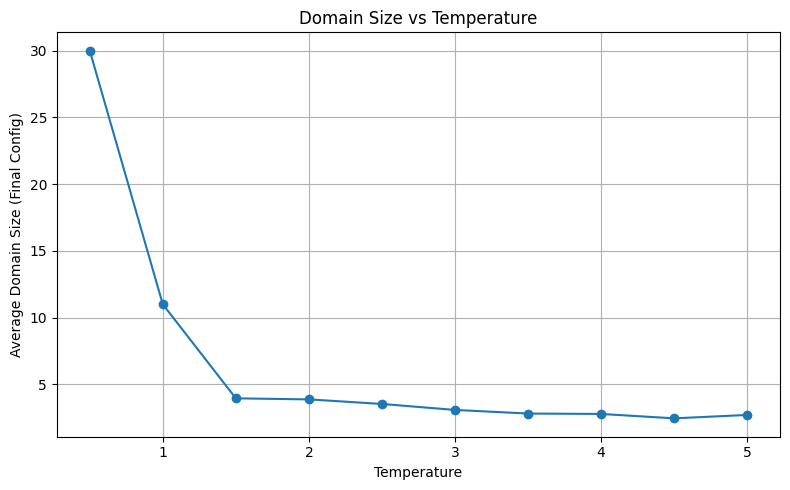

In [39]:
temps = np.linspace(0.5, 5.0, 10)
runs_per_temp = 10
avg_domain_sizes = []

for T in temps:
    domain_sizes = []
    for _ in range(runs_per_temp):
        sim = run_ising_sim(T)
        final_config = sim[-1, :-1]
        domain_count = np.sum(final_config[1:] != final_config[:-1]) + 1
        domain_sizes.append(N / domain_count)
    avg_domain_sizes.append(np.mean(domain_sizes))

plt.figure(figsize=(8, 5))
plt.plot(temps, avg_domain_sizes, marker='o')
plt.xlabel("Temperature")
plt.ylabel("Average Domain Size (Final Config)")
plt.title("Domain Size vs Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()